Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**Note**: This notebook was generated with the assistance of AI. Please exercise caution when interpreting the code or results, and verify findings independently.

## Overview

This dandiset contains single cell electrophysiological recordings from mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). The recordings were made using whole-cell patch-clamp techniques, with neurons transfected with AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP. Responses were recorded following application of DCZ (100 nM) alone or DCZ + soluble mCherry (1 μM).

This dataset validates the use of PAGERs for targeted modulation of neuronal activity, representing an innovative chemogenetic approach for controlling neural circuits.

**Dandiset URL**: https://dandiarchive.org/dandiset/001354/0.250312.0036

## Required packages

This notebook requires the following packages (assumed to be already installed):
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `pandas`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile

# Set up plotting parameters
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Exploring the Dandiset with DANDI API

In [2]:
# Connect to the DANDI API and get dandiset information
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Number of subjects: {metadata['assetsSummary']['numberOfSubjects']}")
print(f"Number of files: {metadata['assetsSummary']['numberOfFiles']}")
print(f"Number of cells: {metadata['assetsSummary']['numberOfCells']}")
print(f"Species: {metadata['assetsSummary']['species'][0]['name']}")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Number of subjects: 8
Number of files: 50
Number of cells: 50
Species: Mus musculus - House mouse


## Exploring the NWB files in the dandiset

In [3]:
# Get a list of all assets (NWB files) in the dandiset
assets = list(dandiset.get_assets())

# Display information about the first few files
print(f"Total number of NWB files: {len(assets)}")
print("\nFirst 5 files:")
for i, asset in enumerate(assets[:5]):
    print(f"{i+1}. {asset.path}")

# Show file distribution by subject
subjects = {}
for asset in assets:
    parts = asset.path.split('/')
    if len(parts) >= 2:
        subject = parts[0].split('-')[1]  # Extract subject ID
        if subject not in subjects:
            subjects[subject] = 0
        subjects[subject] += 1

print(f"\nFiles per subject:")
for subject, count in subjects.items():
    print(f"Subject {subject}: {count} files")

Total number of NWB files: 50

First 5 files:
1. sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
2. sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
3. sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb
4. sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb
5. sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb

Files per subject:
Subject PK: 50 files


## Loading and examining an example NWB file

We'll load one representative file to understand the data structure and content.

In [4]:
# Load the first NWB file for examination
asset = assets[0]
print(f"Loading file: {asset.path}")

# Stream the file remotely (no download required)
url = asset.download_url
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic file information
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Recording layer: {nwb.lab_meta_data['DandiIcephysMetadata'].targeted_layer}")

Loading file: sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb


Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 18:07:19-07:00
Subject ID: PK-109
Recording layer: CA1


## Examining the electrophysiology data structure

In [5]:
# Explore the acquisition data (current clamp responses)
print(f"Number of acquisition series: {len(nwb.acquisition)}")

# Look at the first few current clamp response series
acquisition_keys = list(nwb.acquisition.keys())
print(f"\nFirst 5 acquisition series:")
for key in acquisition_keys[:5]:
    series = nwb.acquisition[key]
    print(f"  {key}: {series.description}, Rate: {series.rate} Hz, Duration: {len(series.data)/series.rate:.1f} s")

# Explore stimulus data
print(f"\nNumber of stimulus series: {len(nwb.stimulus)}")
stimulus_keys = list(nwb.stimulus.keys())
print(f"First 5 stimulus series:")
for key in stimulus_keys[:5]:
    series = nwb.stimulus[key]
    print(f"  {key}: {series.description}, Rate: {series.rate} Hz")

Number of acquisition series: 624

First 5 acquisition series:
  current_clamp-response-01-ch-0: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0 s
  current_clamp-response-01-ch-1: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0 s
  current_clamp-response-02-ch-0: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0 s
  current_clamp-response-02-ch-1: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0 s
  current_clamp-response-03-ch-0: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0 s

Number of stimulus series: 624
First 5 stimulus series:
  stimulus-01-ch-0: Stim type: ramp, Rate: 20000.0 Hz
  stimulus-01-ch-1: Stim type: ramp, Rate: 20000.0 Hz
  stimulus-02-ch-0: Stim type: ramp, Rate: 20000.0 Hz
  stimulus-02-ch-1: Stim type: ramp, Rate: 20000.0 Hz
  stimulus-03-ch-0: Stim type: ramp, Rate: 20000.0 Hz


## Visualizing current clamp recordings

Let's examine a few representative current clamp recordings showing both stimulus and response.

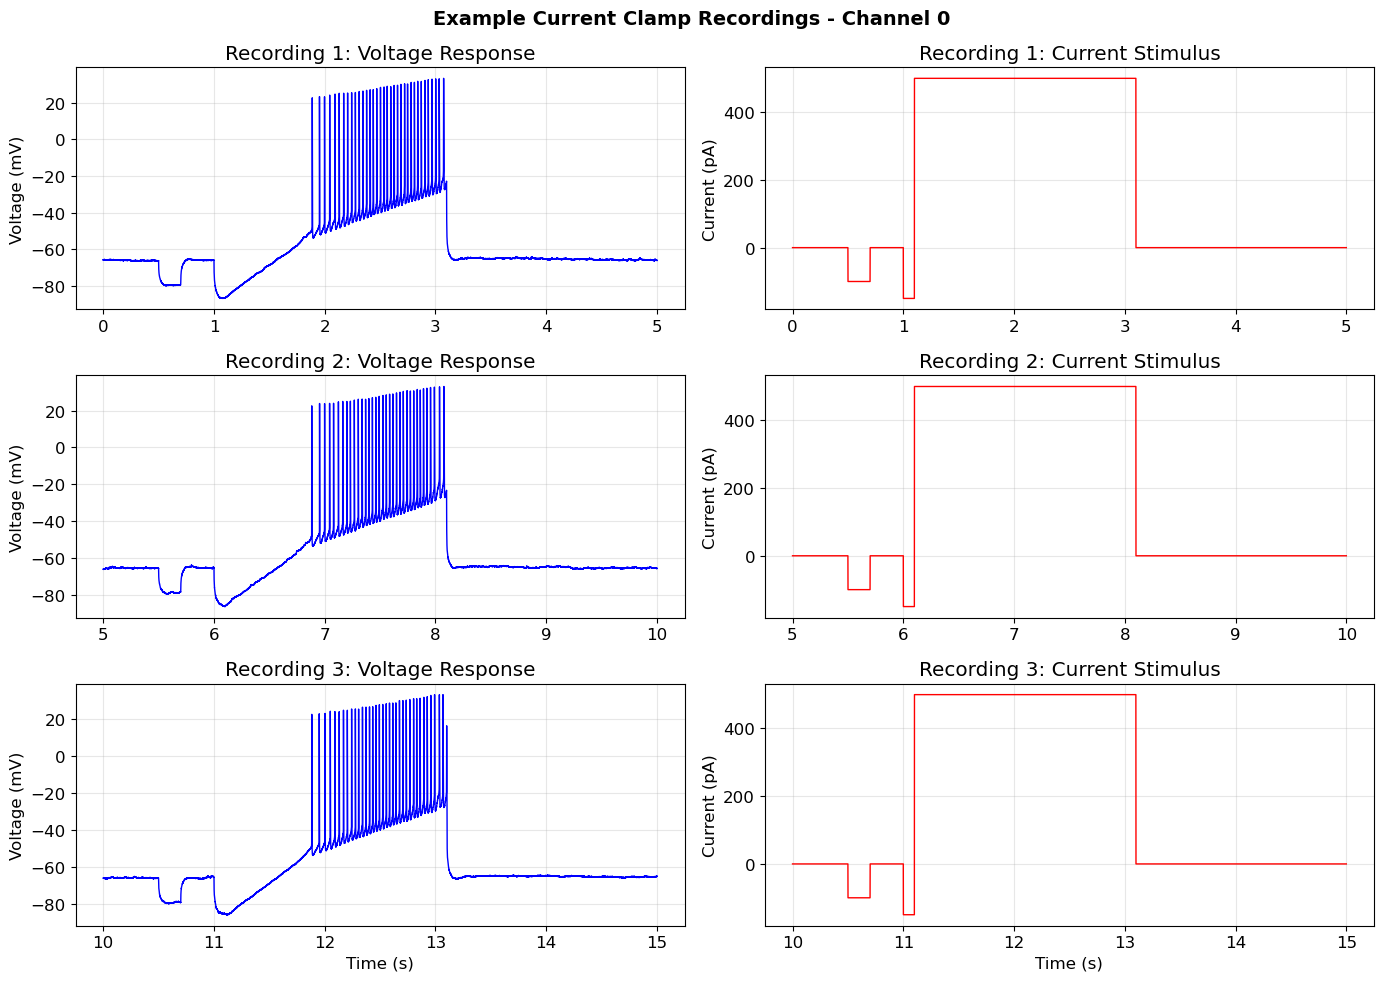

In [6]:
# Plot the first few current clamp recordings (channel 0 only to avoid redundancy)
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Example Current Clamp Recordings - Channel 0', fontsize=14, fontweight='bold')

# Select first 3 recordings for visualization
for i in range(3):
    # Get response and stimulus data
    response_key = f"current_clamp-response-{i+1:02d}-ch-0"
    stimulus_key = f"stimulus-{i+1:02d}-ch-0"
    
    if response_key in nwb.acquisition and stimulus_key in nwb.stimulus:
        response = nwb.acquisition[response_key]
        stimulus = nwb.stimulus[stimulus_key]
        
        # Create time arrays
        time_response = np.arange(len(response.data)) / response.rate + response.starting_time
        time_stimulus = np.arange(len(stimulus.data)) / stimulus.rate + stimulus.starting_time
        
        # Convert data to physical units
        voltage_data = response.data[:] * response.conversion  # Convert to volts
        current_data = stimulus.data[:] * stimulus.conversion  # Convert to amperes
        
        # Plot voltage response
        axes[i, 0].plot(time_response, voltage_data * 1000, 'b-', linewidth=1)  # Convert to mV
        axes[i, 0].set_ylabel('Voltage (mV)')
        axes[i, 0].set_title(f'Recording {i+1}: Voltage Response')
        axes[i, 0].grid(True, alpha=0.3)
        
        # Plot current stimulus
        axes[i, 1].plot(time_stimulus, current_data * 1e12, 'r-', linewidth=1)  # Convert to pA
        axes[i, 1].set_ylabel('Current (pA)')
        axes[i, 1].set_title(f'Recording {i+1}: Current Stimulus')
        axes[i, 1].grid(True, alpha=0.3)
        
        # Set x-axis labels for bottom plots
        if i == 2:
            axes[i, 0].set_xlabel('Time (s)')
            axes[i, 1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

## Analyzing stimulus protocols

Let's examine the different types of stimulation protocols used in these experiments.

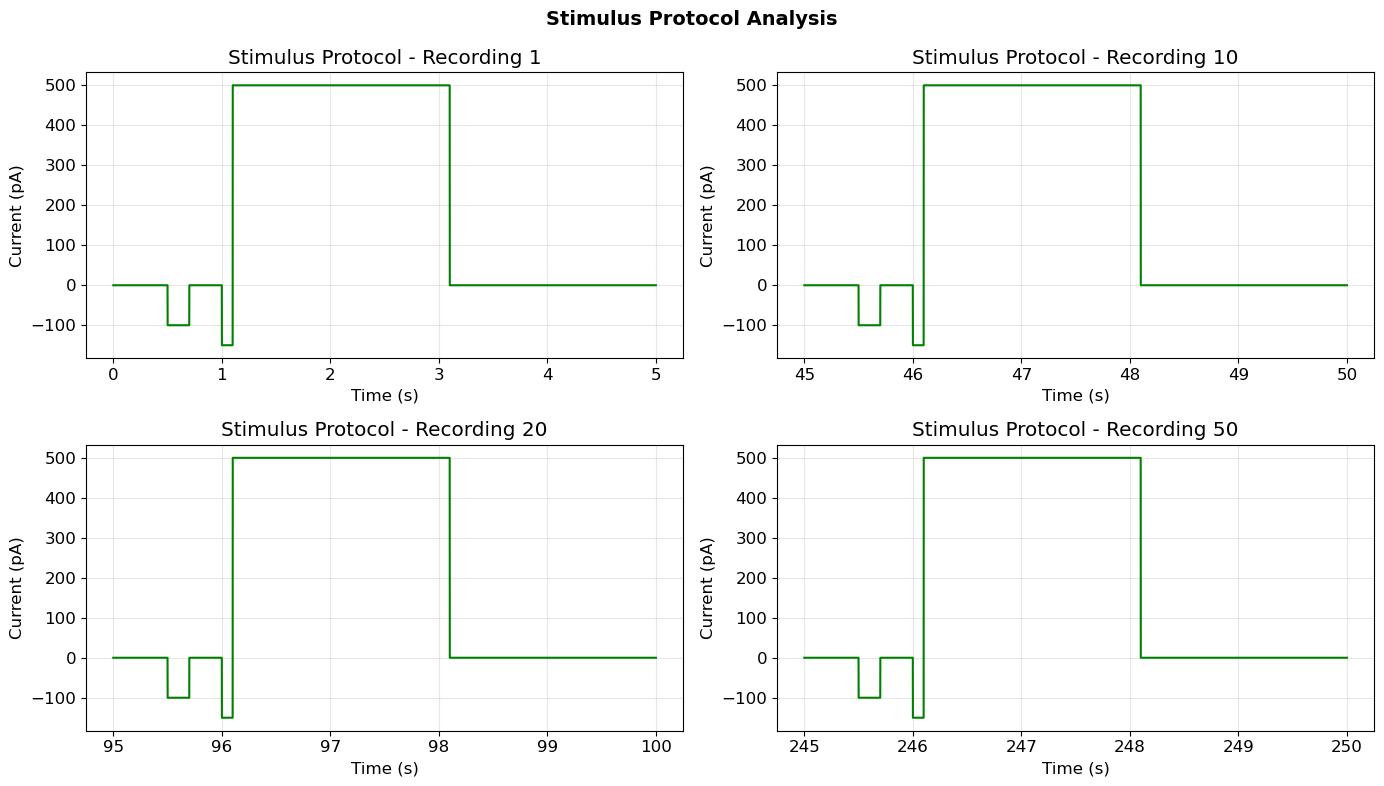

In [7]:
# Analyze stimulus patterns across multiple recordings
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Stimulus Protocol Analysis', fontsize=14, fontweight='bold')

# Plot stimulus waveforms for recordings 1, 10, 20, and 50
recording_indices = [1, 10, 20, 50]
positions = [(0,0), (0,1), (1,0), (1,1)]

for idx, pos in zip(recording_indices, positions):
    stimulus_key = f"stimulus-{idx:02d}-ch-0"
    if stimulus_key in nwb.stimulus:
        stimulus = nwb.stimulus[stimulus_key]
        time_stimulus = np.arange(len(stimulus.data)) / stimulus.rate + stimulus.starting_time
        current_data = stimulus.data[:] * stimulus.conversion * 1e12  # Convert to pA
        
        axes[pos].plot(time_stimulus, current_data, 'g-', linewidth=1.5)
        axes[pos].set_title(f'Stimulus Protocol - Recording {idx}')
        axes[pos].set_xlabel('Time (s)')
        axes[pos].set_ylabel('Current (pA)')
        axes[pos].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Examining response characteristics across recordings

Let's analyze the membrane potential responses and look for patterns across different stimulation protocols.

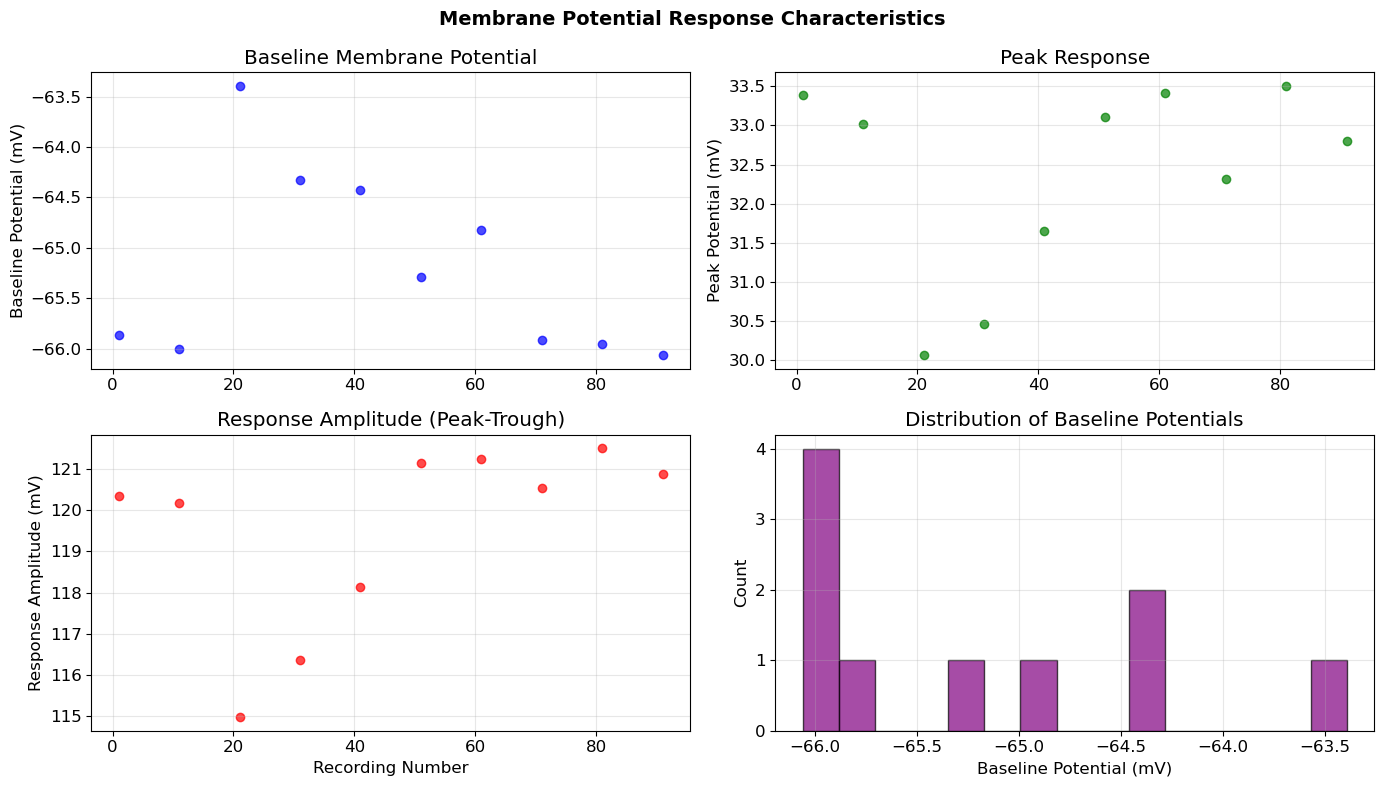

Summary of membrane potential characteristics:
       recording  baseline_mV  peak_mV  trough_mV  amplitude_mV
count      10.00        10.00    10.00      10.00         10.00
mean       46.00       -65.21    32.37     -87.16        119.53
std        30.28         0.92     1.25       1.11          2.27
min         1.00       -66.06    30.06     -88.23        114.96
25%        23.50       -65.95    31.81     -88.04        118.64
50%        46.00       -65.57    32.91     -87.49        120.45
75%        68.50       -64.53    33.32     -86.61        121.09
max        91.00       -63.39    33.51     -84.90        121.52


In [8]:
# Analyze membrane potential baseline and response amplitude across recordings
recording_data = []

# Sample every 10th recording to avoid loading too much data
sample_indices = range(1, min(101, len(nwb.acquisition)//2), 10)  # Sample recordings 1, 11, 21, etc.

for idx in sample_indices:
    response_key = f"current_clamp-response-{idx:02d}-ch-0"
    if response_key in nwb.acquisition:
        response = nwb.acquisition[response_key]
        voltage_data = response.data[:] * response.conversion * 1000  # Convert to mV
        
        # Calculate basic statistics
        baseline = np.mean(voltage_data[:1000])  # First 1000 points as baseline
        peak = np.max(voltage_data)
        trough = np.min(voltage_data)
        amplitude = peak - trough
        
        recording_data.append({
            'recording': idx,
            'baseline_mV': baseline,
            'peak_mV': peak,
            'trough_mV': trough,
            'amplitude_mV': amplitude
        })

# Convert to DataFrame for analysis
df = pd.DataFrame(recording_data)

# Plot response characteristics
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Membrane Potential Response Characteristics', fontsize=14, fontweight='bold')

# Baseline membrane potential
axes[0,0].scatter(df['recording'], df['baseline_mV'], alpha=0.7, color='blue')
axes[0,0].set_ylabel('Baseline Potential (mV)')
axes[0,0].set_title('Baseline Membrane Potential')
axes[0,0].grid(True, alpha=0.3)

# Peak response
axes[0,1].scatter(df['recording'], df['peak_mV'], alpha=0.7, color='green')
axes[0,1].set_ylabel('Peak Potential (mV)')
axes[0,1].set_title('Peak Response')
axes[0,1].grid(True, alpha=0.3)

# Response amplitude
axes[1,0].scatter(df['recording'], df['amplitude_mV'], alpha=0.7, color='red')
axes[1,0].set_xlabel('Recording Number')
axes[1,0].set_ylabel('Response Amplitude (mV)')
axes[1,0].set_title('Response Amplitude (Peak-Trough)')
axes[1,0].grid(True, alpha=0.3)

# Distribution of baseline potentials
axes[1,1].hist(df['baseline_mV'], bins=15, alpha=0.7, color='purple', edgecolor='black')
axes[1,1].set_xlabel('Baseline Potential (mV)')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Distribution of Baseline Potentials')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary of membrane potential characteristics:")
print(df.describe().round(2))

## Examining temporal dynamics

Let's look at how responses evolve over the course of individual recordings to understand the dynamics of PAGER activation.

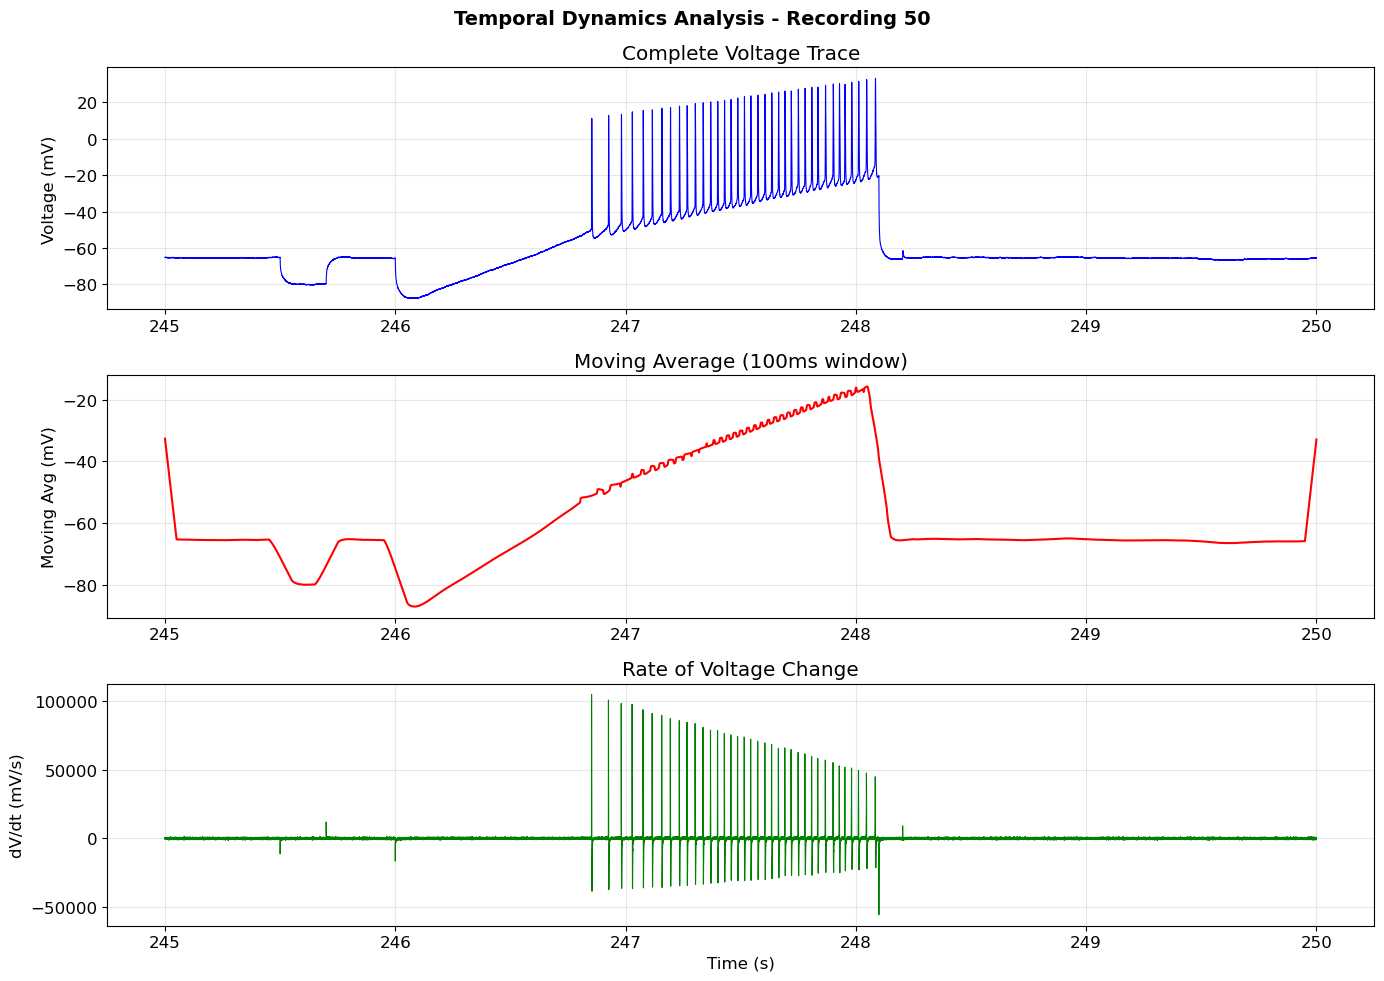

In [9]:
# Analyze temporal dynamics within a longer recording
response_key = "current_clamp-response-50-ch-0"  # Choose a representative recording
if response_key in nwb.acquisition:
    response = nwb.acquisition[response_key]
    voltage_data = response.data[:] * response.conversion * 1000  # Convert to mV
    time_array = np.arange(len(voltage_data)) / response.rate + response.starting_time
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    fig.suptitle('Temporal Dynamics Analysis - Recording 50', fontsize=14, fontweight='bold')
    
    # Full trace
    axes[0].plot(time_array, voltage_data, 'b-', linewidth=0.8)
    axes[0].set_ylabel('Voltage (mV)')
    axes[0].set_title('Complete Voltage Trace')
    axes[0].grid(True, alpha=0.3)
    
    # Calculate moving average to show trends
    window_size = int(response.rate * 0.1)  # 100ms window
    moving_avg = np.convolve(voltage_data, np.ones(window_size)/window_size, mode='same')
    axes[1].plot(time_array, moving_avg, 'r-', linewidth=1.5)
    axes[1].set_ylabel('Moving Avg (mV)')
    axes[1].set_title('Moving Average (100ms window)')
    axes[1].grid(True, alpha=0.3)
    
    # Calculate and plot derivative to show rate of change
    dt = 1.0 / response.rate
    derivative = np.gradient(voltage_data, dt)
    axes[2].plot(time_array, derivative, 'g-', linewidth=0.8)
    axes[2].set_xlabel('Time (s)')
    axes[2].set_ylabel('dV/dt (mV/s)')
    axes[2].set_title('Rate of Voltage Change')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Summary and Future Directions

This notebook demonstrates how to access and analyze the hippocampal PAGER electrophysiology data from Dandiset 001354. The data contains systematic current clamp recordings from CA1 neurons expressing programmable antigen-gated receptors.

Key observations:
- Each file contains hundreds of sequential recordings with consistent ramp stimulation protocols
- Membrane potential responses show variability both within and across recordings
- The temporal resolution (20 kHz sampling) allows for detailed analysis of cellular responses

Potential analyses for future exploration include spike detection, dose-response relationships, temporal correlation analysis, and comparison of responses between different experimental conditions (DCZ alone vs. DCZ + mCherry).